In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

In [2]:
# mks units
Mo = 2e30
G = 6.67e-11
c = 3e8
Ro = 6.957e8

In [3]:
pc = 252*Mo/(4*np.pi*Ro**3)
print(str(format(pc, '.2E')) + ' kg/m^3')
print(str(format(pc*1000/(100*100*100), '.2E')) + ' g/cm^3')
print(str(format(pc *Ro*Ro*Ro/(Mo), '.2E')) + ' Mo/Ro^3')

1.19E+05 kg/m^3
1.19E+02 g/cm^3
2.01E+01 Mo/Ro^3


In [4]:
Rrange = np.linspace(0, .2*Ro, 1000)
M = ((4*np.pi*pc)/(Ro**6))*(Ro-Rrange)**6*Rrange**2
Min = trapz(M, Rrange)
print('M_r<0.2 = ' +str(format(Min/Mo, '.2E')) +' Mo')

M_r<0.2 = 2.62E-01 Mo


In [5]:
Pc = (G*Mo*Min)/(4*np.pi*(0.2*Ro)**4)
print('Central Pressure: ' +format(Pc, '.2E') +' Pa')
print('Central Pressure: ' +format(Pc*1000/100, '.2E') +' dyn/cm^2')

Central Pressure: 1.48E+16 Pa
Central Pressure: 1.48E+17 dyn/cm^2


In [6]:
mu = (0.77*28.014 +0.23*31.999)
print('mu: ' +format(mu, '.2E') +' amu')

mu: 2.89E+01 amu


In [7]:
T = 280
k = 1.38e-23
mh = 1.67e-27
g = 9.8
H = (k*T)/(mu*mh*g)
print('Scale height: ' +format(H, '.2E') +' m')

Scale height: 8.16E+03 m


In [8]:
P0 = 101500
r = 2943
Pr = np.exp(-r/H)
print('Atmospheric Pressure: ' +format(Pr, '.2E') +' P_0')

Atmospheric Pressure: 6.97E-01 P_0


In [102]:
Tc = 60
Mc = (10**5)*Mo
rho = (Mc)/((4/3)*np.pi*(50*3.09*10**16)**3)
print('Cloud Density: ' +format(rho/1000, '.2E') +' g/cm^3')
rhoJ = (((5*k*Tc)/(2*mh*G))**3)*((3)/(4*np.pi*(Mc**2)))
print('Jean\'s Density: ' +format(rhoJ/1000, '.2E') +' g/cm^3')

Cloud Density: 1.29E-23 g/cm^3
Jean's Density: 3.83E-26 g/cm^3


In [107]:
rhot = (((5*k*Tc)/(2*mh*G))**3)
rhote = ((3)/(4*np.pi*(Mc**2)))
print(rhot)
print(rhote)

6.417769591888385e+48
5.968310365946076e-72


In [121]:
# Columns: Gaia DR3 ID, RA, Dec, parallax (mas), G, GBP – GRP, GBP – G, and G – GRP.
gaia = pandas.read_csv('/d/users/nikhil/Downloads/Gaia_Glt19_dlt150pc.csv')
ras = gaia['ra']
decs = gaia['dec']
par = gaia['parallax']
Gmag = gaia['phot_g_mean_mag']
bpmrp = gaia['bp_rp']
bpmg = gaia['bp_g']
gmrp = gaia['g_rp']
distances = 1.5*10**11/(np.tan(par*np.pi/(1000*60*60*180))*3.09*10**16)
GM = Gmag -5*(np.log10(distances)) +5

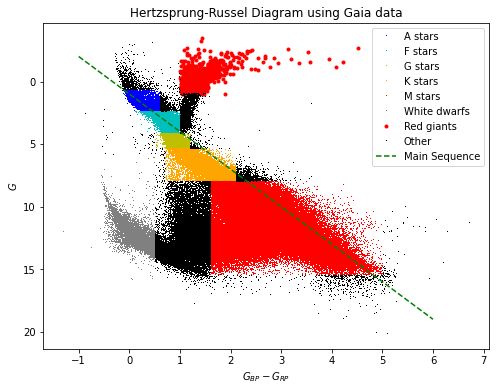

In [116]:
plt.figure(figsize = [8, 6])
iA = (GM > 0.7) & (GM < 2.4) & (bpmrp > -0.3) & (bpmrp < 0.6)
iF = (GM > 2.4) & (GM < 4.2) & (bpmrp > 0.1) & (bpmrp < 1)
iG = (GM > 4.2) & (GM < 5.4) & (bpmrp > 0.5) & (bpmrp < 1.2)
iK = (GM > 5.4) & (GM < 8.0) & (bpmrp > 0.7) & (bpmrp < 2.1)
iM = (GM > 8.0) & (GM < 15.5) & (bpmrp > 1.6) & (bpmrp < 5.0)
iW = (GM > 6) & (bpmrp < 0.5)
iRG = (bpmrp > 1) & (GM < 1)
testx = np.linspace(-1, 6.0, 1000)
testline = 3*(testx) +1
plt.plot(bpmrp[iA], GM[iA], ',b', label = 'A stars')
plt.plot(bpmrp[iF], GM[iF], ',c', label = 'F stars')
plt.plot(bpmrp[iG], GM[iG], ',y', label = 'G stars')
plt.plot(bpmrp[iK], GM[iK], ',', color = 'orange', label = 'K stars')
plt.plot(bpmrp[iM], GM[iM], ',r', label = 'M stars')
plt.plot(bpmrp[iW], GM[iW], ',', label = 'White dwarfs', color = 'gray')
plt.plot(bpmrp[iRG], GM[iRG], '.r', label = 'Red giants')
plt.plot(bpmrp[~iA & ~iF & ~iG & ~iK & ~iM & ~iW & ~iRG],\
         GM[~iA & ~iF & ~iG & ~iK & ~iM & ~iW & ~iRG]\
         , ',k', label = 'Other')
plt.plot(testx, testline, '--g', label = 'Main Sequence')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Hertzsprung-Russel Diagram using Gaia data')
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$G$')
plt.legend()
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/HertsprungRusselGaia.png')

In [133]:
print('Fraction of M dwarfs in the whole set: ' \
      +str(np.round(100*len(GM[iM])/len(GM), 3)) +'%')
iclose = (distances < 40)
print('Fraction of M dwarfs closer than 40 pc: ' \
      +str(np.round(100*len(GM[iM & iclose])/len(GM[iclose]), 3)) +'%')

Fraction of M dwarfs in the whole set: 70.029%
Fraction of M dwarfs closer than 40 pc: 70.209%


M_G: 7.076387228469315, G_BP-G_RP: -0.49958706
RA: 70.83873938587688
DEC: 46.70156304230519
Object classified as white dwarf by roughly defined parameters.


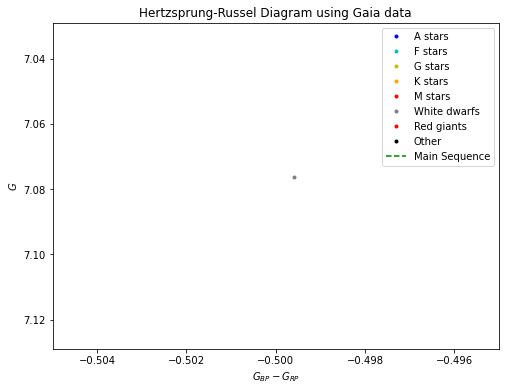

In [146]:
plt.figure(figsize = [8, 6])
iA = (GM > 0.7) & (GM < 2.4) & (bpmrp > -0.3) & (bpmrp < 0.6)
iF = (GM > 2.4) & (GM < 4.2) & (bpmrp > 0.1) & (bpmrp < 1)
iG = (GM > 4.2) & (GM < 5.4) & (bpmrp > 0.5) & (bpmrp < 1.2)
iK = (GM > 5.4) & (GM < 8.0) & (bpmrp > 0.7) & (bpmrp < 2.1)
iM = (GM > 8.0) & (GM < 15.5) & (bpmrp > 1.6) & (bpmrp < 5.0)
iW = (GM > 6) & (bpmrp < 0.5)
iRG = (bpmrp > 1) & (GM < 1)
testx = np.linspace(-1, 6.0, 1000)
testline = 3*(testx) +1
plt.plot(bpmrp[iA], GM[iA], '.b', label = 'A stars')
plt.plot(bpmrp[iF], GM[iF], '.c', label = 'F stars')
plt.plot(bpmrp[iG], GM[iG], '.y', label = 'G stars')
plt.plot(bpmrp[iK], GM[iK], '.', color = 'orange', label = 'K stars')
plt.plot(bpmrp[iM], GM[iM], '.r', label = 'M stars')
plt.plot(bpmrp[iW], GM[iW], '.', label = 'White dwarfs', color = 'gray')
plt.plot(bpmrp[iRG], GM[iRG], '.r', label = 'Red giants')
plt.plot(bpmrp[~iA & ~iF & ~iG & ~iK & ~iM & ~iW & ~iRG],\
         GM[~iA & ~iF & ~iG & ~iK & ~iM & ~iW & ~iRG]\
         , '.k', label = 'Other')
plt.plot(testx, testline, '--g', label = 'Main Sequence')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Hertzsprung-Russel Diagram using Gaia data')
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$G$')
plt.legend()
#plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/HertsprungRusselGaia.png')
plt.xlim(-.505, -.495)
plt.ylim(7.079+.05, 7.079-0.05)
xd = bpmrp+.5
yd = GM-7.079
dist = (xd**2 +yd**2)**0.5
print('M_G: ' +str(GM[np.argmin(dist)]) +', G_BP-G_RP: ' +str(bpmrp[np.argmin(dist)]))
print('RA: ' +str(ras[np.argmin(dist)]) +'\nDEC: ' +str(decs[np.argmin(dist)]))
print('Object classified as white dwarf by roughly defined parameters.')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/5cplot.png')

M_G: 5.243937461800611, G_BP-G_RP: 2.3540802
RA: 246.53881047417445
DEC: -24.570171196663942
Object is unclassified by loose categorization.


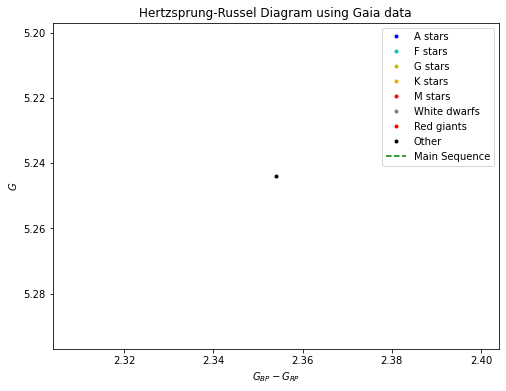

In [147]:
plt.figure(figsize = [8, 6])
iA = (GM > 0.7) & (GM < 2.4) & (bpmrp > -0.3) & (bpmrp < 0.6)
iF = (GM > 2.4) & (GM < 4.2) & (bpmrp > 0.1) & (bpmrp < 1)
iG = (GM > 4.2) & (GM < 5.4) & (bpmrp > 0.5) & (bpmrp < 1.2)
iK = (GM > 5.4) & (GM < 8.0) & (bpmrp > 0.7) & (bpmrp < 2.1)
iM = (GM > 8.0) & (GM < 15.5) & (bpmrp > 1.6) & (bpmrp < 5.0)
iW = (GM > 6) & (bpmrp < 0.5)
iRG = (bpmrp > 1) & (GM < 1)
testx = np.linspace(-1, 6.0, 1000)
testline = 3*(testx) +1
plt.plot(bpmrp[iA], GM[iA], '.b', label = 'A stars')
plt.plot(bpmrp[iF], GM[iF], '.c', label = 'F stars')
plt.plot(bpmrp[iG], GM[iG], '.y', label = 'G stars')
plt.plot(bpmrp[iK], GM[iK], '.', color = 'orange', label = 'K stars')
plt.plot(bpmrp[iM], GM[iM], '.r', label = 'M stars')
plt.plot(bpmrp[iW], GM[iW], '.', label = 'White dwarfs', color = 'gray')
plt.plot(bpmrp[iRG], GM[iRG], '.r', label = 'Red giants')
plt.plot(bpmrp[~iA & ~iF & ~iG & ~iK & ~iM & ~iW & ~iRG],\
         GM[~iA & ~iF & ~iG & ~iK & ~iM & ~iW & ~iRG]\
         , '.k', label = 'Other')
plt.plot(testx, testline, '--g', label = 'Main Sequence')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Hertzsprung-Russel Diagram using Gaia data')
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$G$')
plt.legend(loc = 'upper right')
#plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/HertsprungRusselGaia.png')
plt.xlim(2.354-0.05, 2.354+0.05)
plt.ylim(5.247+.05, 5.247-0.05)
xd = bpmrp-2.354
yd = GM-5.247
dist = (xd**2 +yd**2)**0.5
print('M_G: ' +str(GM[np.argmin(dist)]) +', G_BP-G_RP: ' +str(bpmrp[np.argmin(dist)]))
print('RA: ' +str(ras[np.argmin(dist)]) +'\nDEC: ' +str(decs[np.argmin(dist)]))
print('Object is unclassified by loose categorization.')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/5dplot.png')

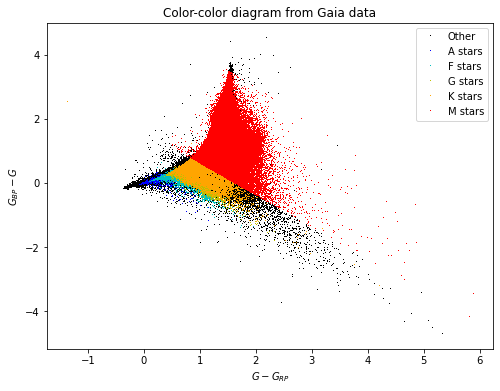

In [148]:
plt.figure(figsize = [8, 6])
plt.plot(gmrp[~iA & ~iF & ~iG & ~iK & ~iM],\
         bpmg[~iA & ~iF & ~iG & ~iK & ~iM]\
         , ',k', label = 'Other')
plt.plot(gmrp[iA], bpmg[iA], ',b', label = 'A stars')
plt.plot(gmrp[iF], bpmg[iF], ',c', label = 'F stars')
plt.plot(gmrp[iG], bpmg[iG], ',y', label = 'G stars')
plt.plot(gmrp[iK], bpmg[iK], ',', color = 'orange', label = 'K stars')
plt.plot(gmrp[iM], bpmg[iM], ',r', label = 'M stars')
plt.legend()
plt.ylabel(r'$G_{BP}-G$')
plt.xlabel(r'$G-G_{RP}$')
plt.title('Color-color diagram from Gaia data')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/colorcolorhrdiagram.png')